In [1]:
%matplotlib inline
from zhu import *
import imp

In [5]:
imp.reload(zhu)
from zhu import *

2


TypeError: 'AxesSubplot' object does not support indexing

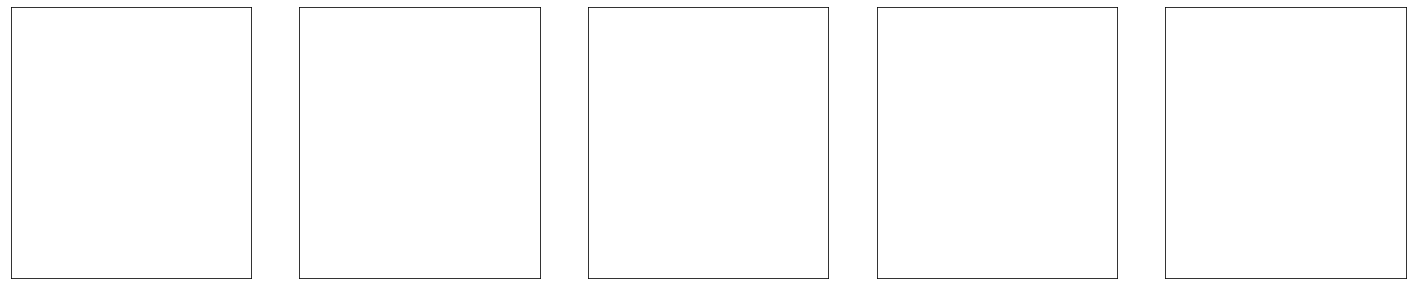

In [2]:
folder = 'to_visapp/many'
many_objects(2, 'data/'+folder,'data/'+folder+'_result', 'png')

20


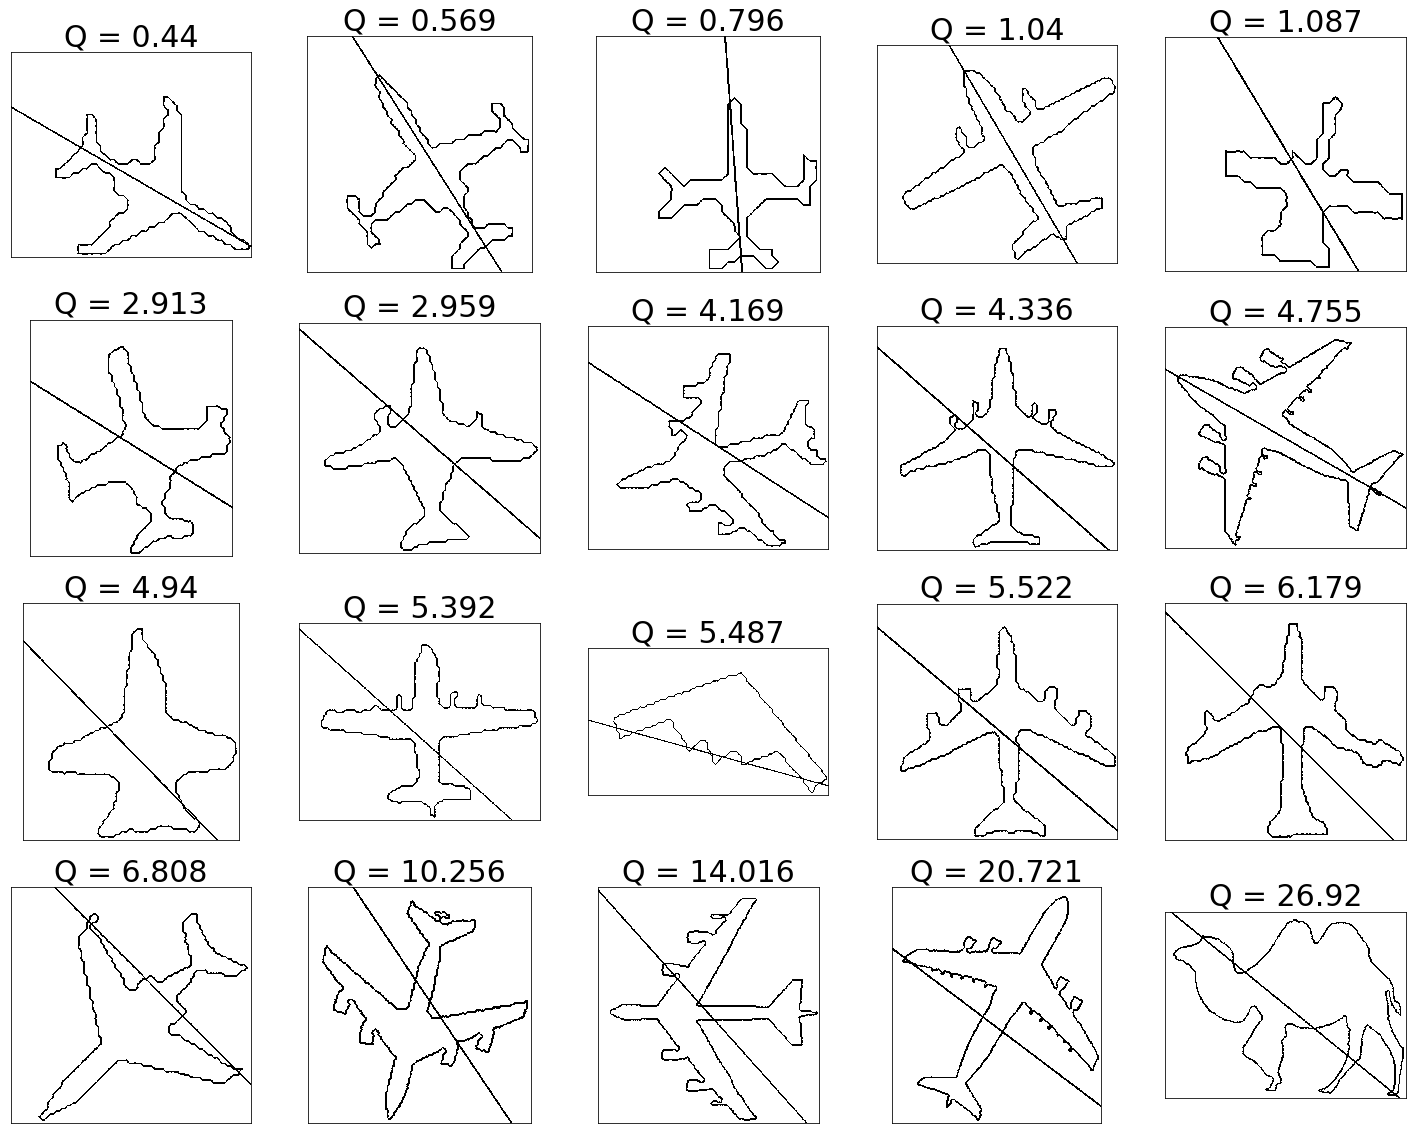

In [3]:
folder = 'to_visapp/planes'
many_objects(5, 'data/'+folder,'data/'+folder+'_result', 'png')

In [10]:
imp.reload(zhu)
from zhu import *

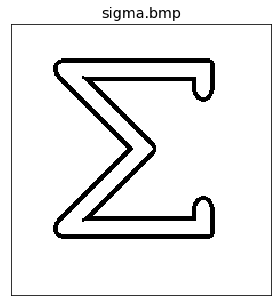

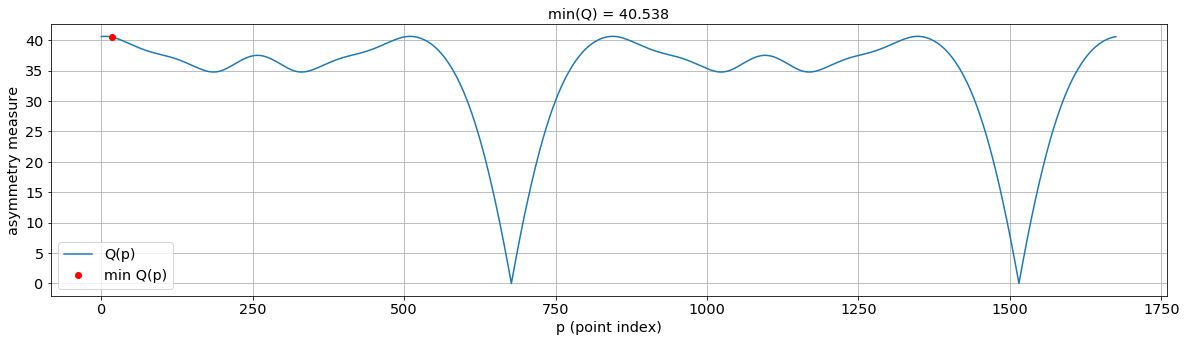

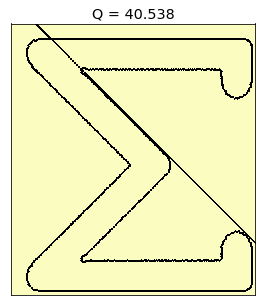

In [4]:
folder = 'to_visapp/by_one'
save_results('data/'+folder,'data/'+folder+'_result',False,'csv','png')

In [3]:
import zhu_draw
import zhu_contour
import zhu_symmetry

import numpy as np
from matplotlib import pyplot as plt

In [98]:
import imp
imp.reload(zhu_contour)
imp.reload(zhu_draw)
imp.reload(zhu_symmetry)

<module 'zhu_symmetry' from 'C:\\Users\\Александра\\PROGRAM\\Symmetry\\zhu_symmetry.py'>

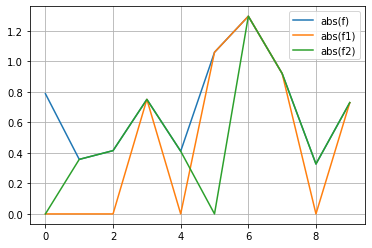

In [12]:
n = 10
f = np.random.random(n) + np.random.random(n)*1j
plt.plot(np.abs(f), label = 'abs(f)')
sm1 = zhu_symmetry.f_abs_based_index(f, alpha=0.2)
f1 = np.zeros(n, dtype=complex)
f1[sm1] = f[sm1]
plt.plot(np.abs(f1), label = 'abs(f1)')
sm2 = zhu_symmetry.f_abs_based_index(f, beta=0.8)
f2 = np.zeros(n, dtype=complex)
f2[sm2] = f[sm2]
plt.plot(np.abs(f2), label = 'abs(f2)')
plt.grid()
plt.legend()
plt.show()

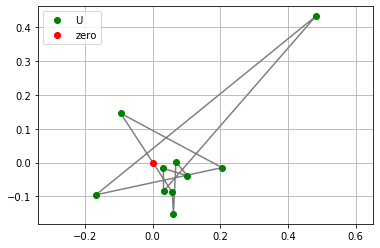

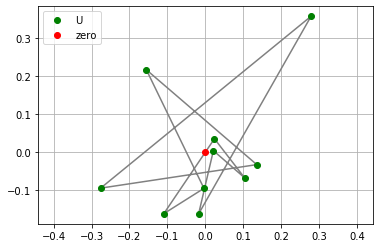

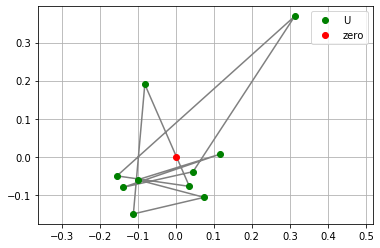

In [13]:
for g in f, f1, f2:
    u = np.fft.ifft(g)
    zhu_draw.contour(u)

In [4]:
import cv2
help(cv2.drawContours)

Help on built-in function drawContours:

drawContours(...)
    drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
    .   @brief Draws contours outlines or filled contours.
    .   
    .   The function draws contour outlines in the image if \f$\texttt{thickness} \ge 0\f$ or fills the area
    .   bounded by the contours if \f$\texttt{thickness}<0\f$ . The example below shows how to retrieve
    .   connected components from the binary image and label them: :
    .   @include snippets/imgproc_drawContours.cpp
    .   
    .   @param image Destination image.
    .   @param contours All the input contours. Each contour is stored as a point vector.
    .   @param contourIdx Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
    .   @param color Color of the contours.
    .   @param thickness Thickness of lines the contours are drawn with. If it is negative (for example,
    .   thickness